In [242]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import seaborn as sns

import numpy as np
import pandas as pd



In [243]:
# Get the data for model and text 
df_model= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='Model')

# set the X (as features for model) and y (target data - task information )
X_modelData = pd.DataFrame(df_model,columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender'])

# preprocessing of the all the data is performed 

from sklearn.preprocessing import StandardScaler            # seams standscalar is doing better
std_scaler = StandardScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)                          
                       

# Know about the features 

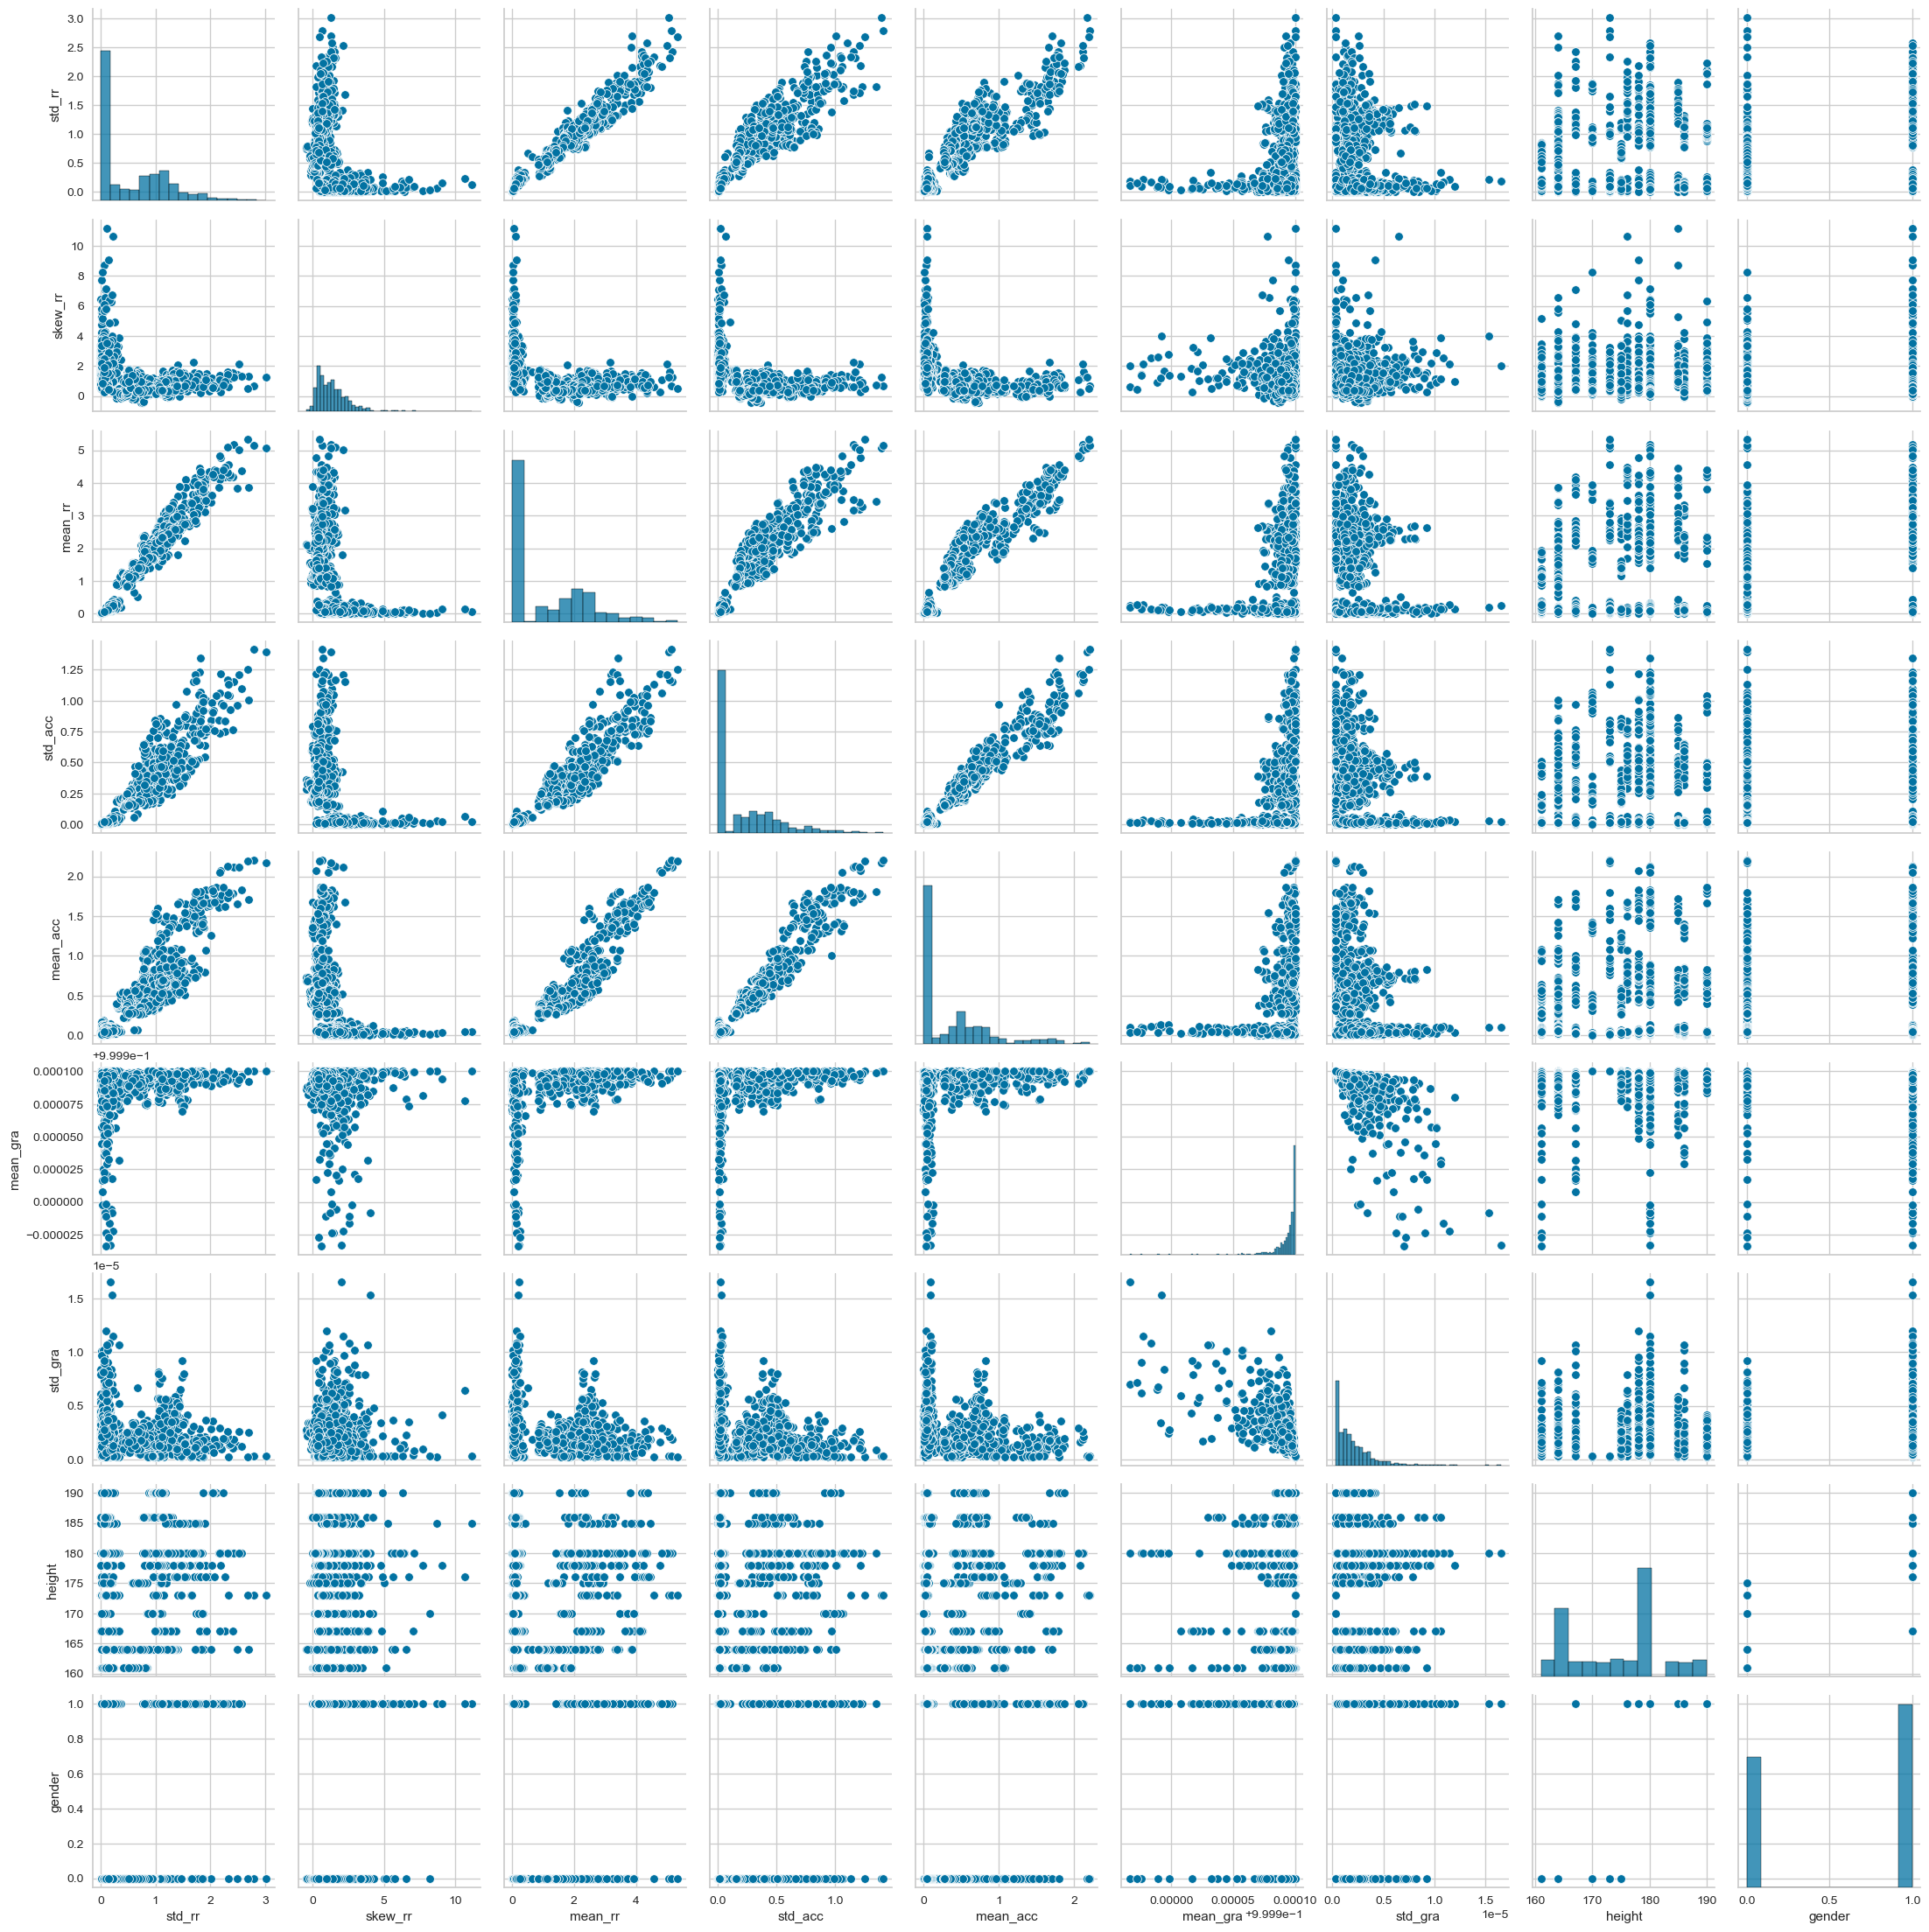

In [244]:
 sns.pairplot(X_modelData)

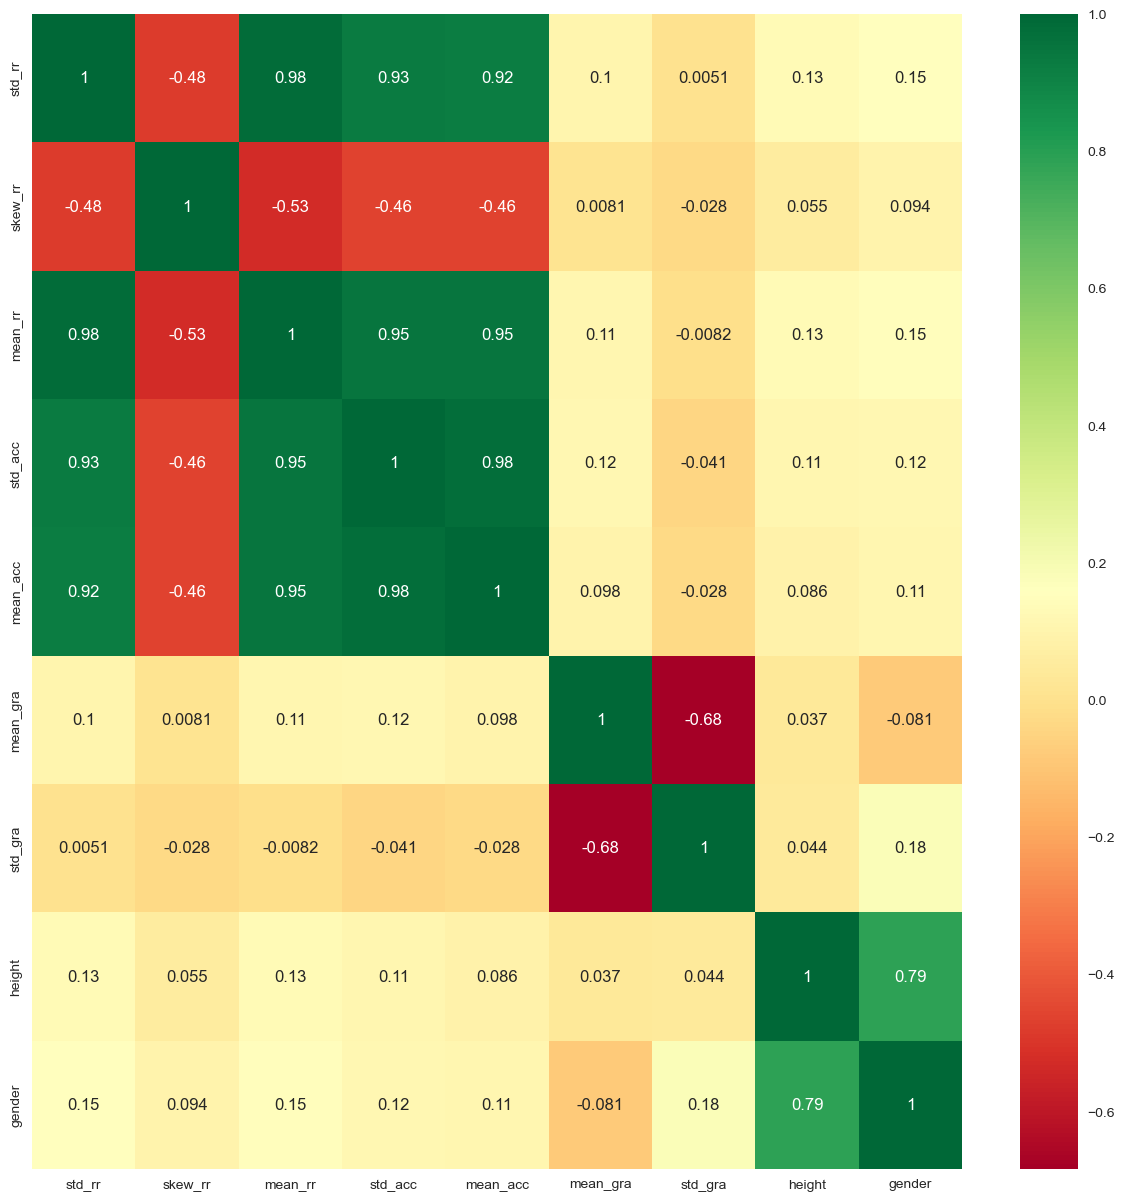

In [245]:
plt.figure(figsize=(15,15))
p=sns.heatmap(X_modelData.corr(), annot=True,cmap='RdYlGn')

,std_rr,skew_rr,mean_rr,std_acc,mean_acc,mean_gra,std_gra,height,gender
0,1.748106,0.517456,3.438953,0.744422,1.341491,0.999998,9.988318e-07,164,0
1,1.879990,0.667456,3.338453,0.725367,1.357286,0.999999,7.113302e-07,164,0
2,1.842166,0.507401,3.397769,0.736906,1.345896,0.999998,1.300188e-06,164,0
3,1.719484,0.434231,3.396546,0.857834,1.427181,0.999995,1.319921e-06,164,0
4,2.010084,0.939107,3.401357,0.844539,1.256208,0.999989,2.856382e-06,164,0
...,...,...,...,...,...,...,...,...,...
1321,0.514151,0.967330,1.116105,0.155289,0.280606,0.999989,1.653505e-06,161,0
1322,1.133945,0.389760,2.341492,0.301602,0.509455,0.999998,1.171201e-06,190,1
1323,1.071709,0.599570,2.221510,0.313530,0.472693,0.999997,1.536029e-06,190,1
1324,1.075594,0.381100,2.241110,0.296935,0.477941,0.999997,1.314398e-06,190,1


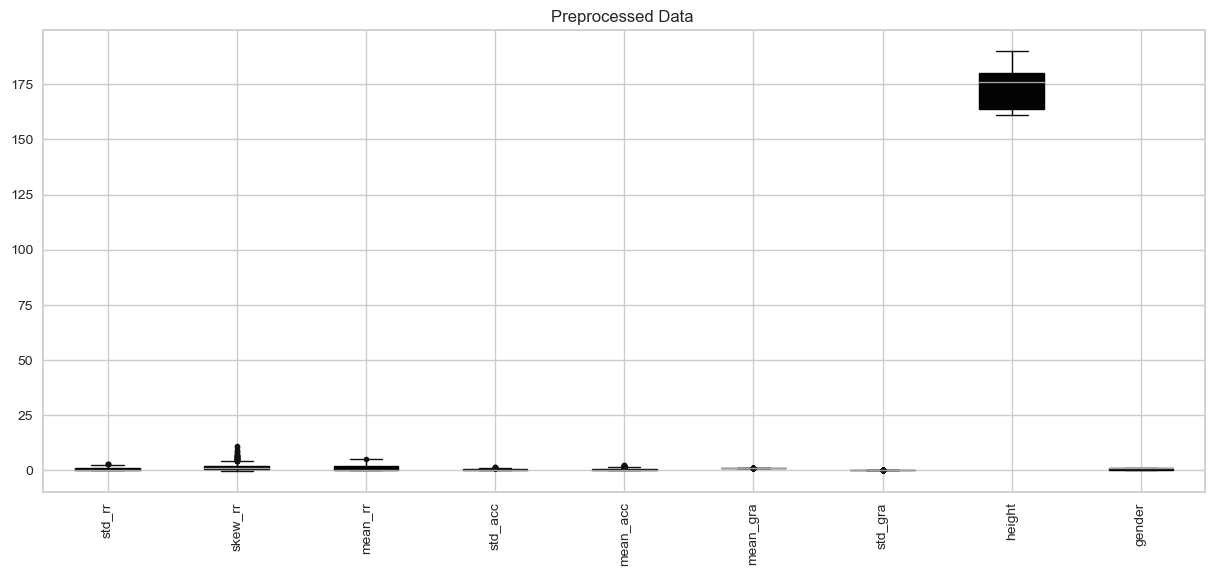

In [246]:
 # ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Preprocessed Data ')

X_modelData

# PCA

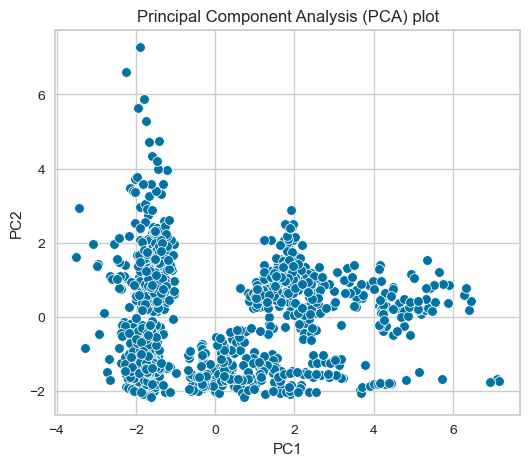

[1, 2, 3, 4, 5, 6]


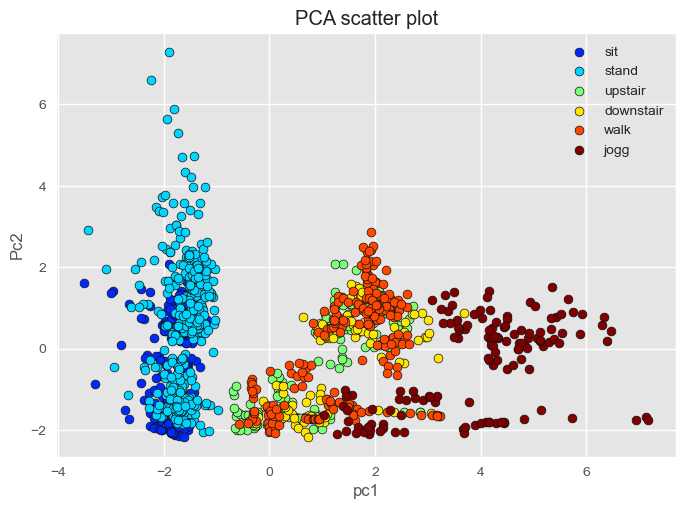

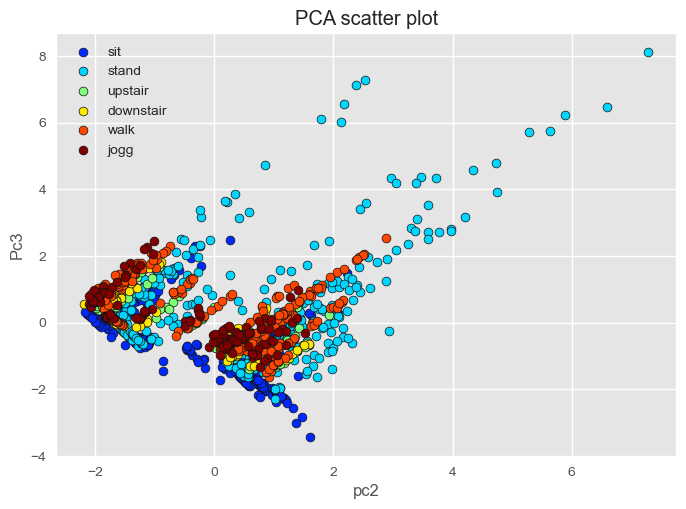

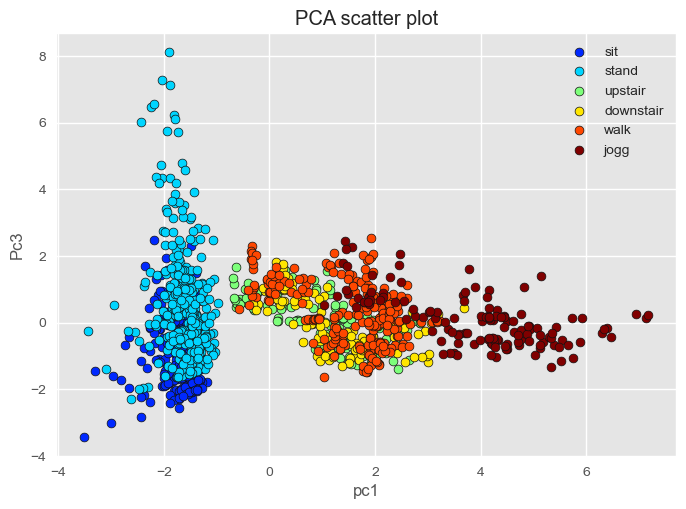

cum_sum_eigenvalues [ 46.74  67.75  85.52  92.89  96.34  98.54  99.64  99.91 100.02]


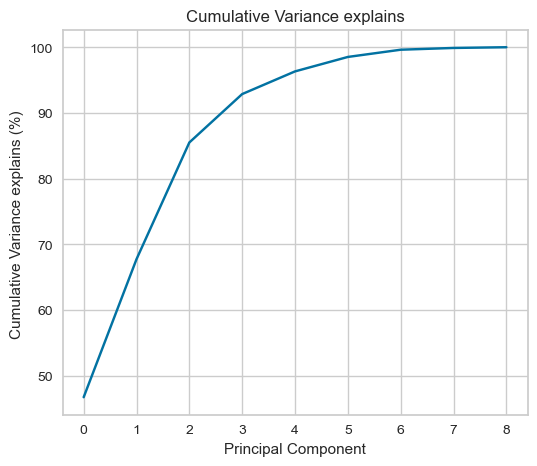

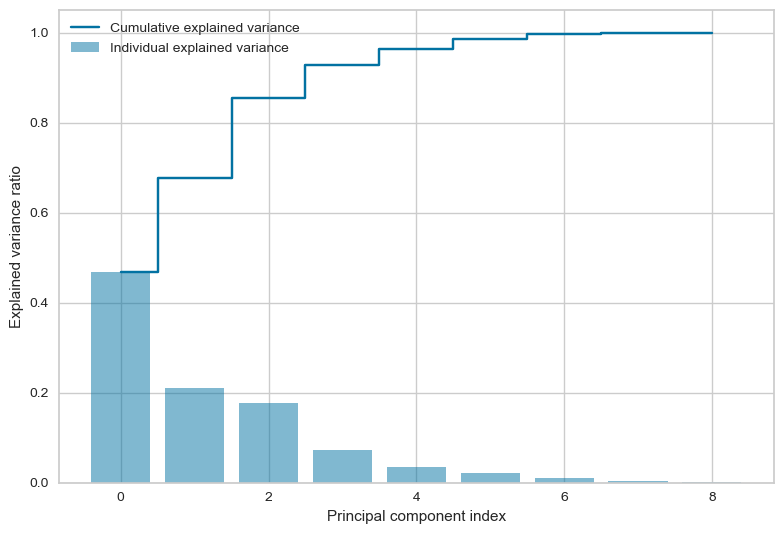

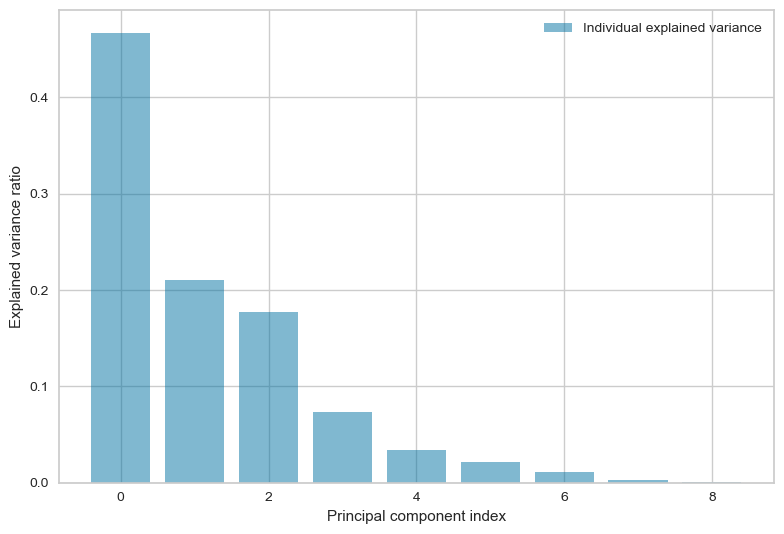

In [247]:
# perform pca for the data 

# referance 1 : https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ 
# referance 2 : https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# Referance 3 : https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

from sklearn.decomposition import PCA

pca = PCA(n_components=9)   # n = number of features 
pca_score = pca.fit_transform(X_modelData_scaled)

pc1_Modelvalues = pca_score[:,0]
pc2_Modelvalues = pca_score[:,1]
pc3_Modelvalues = pca_score[:,2]

plt.figure(figsize=(6,5))
sns.scatterplot(x=pc1_Modelvalues, y=pc2_Modelvalues)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA) plot')
plt.show()


taskinfo =df_model.task_info


# Extract DayNumbers and setting its Legend for ploting 
 
unique_taskinfo = list(set(taskinfo))
print(unique_taskinfo)
#  1.sit 2. stand 3. upstair 4. downstair 5. walk 6. jogg
taskinfoplot=["sit","stand","upstair","downstair","walk","jogg"]   # [1, 2, 3, 4, 5, 6]

# 2D Scatter plot of Raw data using Day No 
colors = [plt.cm.jet(float(i)/max(unique_taskinfo)) for i in unique_taskinfo]


with plt.style.context(('ggplot')):
    for i, u in enumerate(unique_taskinfo):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        x_axis_i = [pca_score[j,0] for j in range(len(pca_score[:,0])) if taskinfo[j] == u]
        y_axis_i = [pca_score[j,1] for j in range(len(pca_score[:,1])) if taskinfo[j] == u]
        plt.scatter(x_axis_i, y_axis_i, c=col, s=40, edgecolors='k',label=str(u))
        #plt.legend(Details_data[i],loc='best')
    plt.xlabel('pc1')
    plt.ylabel('Pc2')
    plt.title('PCA scatter plot')
    plt.legend(taskinfoplot,loc='best')
    plt.show()
# End of this Scatter plot 


with plt.style.context(('ggplot')):
    for i, u in enumerate(unique_taskinfo):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        x_axis_i = [pca_score[j,1] for j in range(len(pca_score[:,0])) if taskinfo[j] == u]
        y_axis_i = [pca_score[j,2] for j in range(len(pca_score[:,1])) if taskinfo[j] == u]
        plt.scatter(x_axis_i, y_axis_i, c=col, s=40, edgecolors='k',label=str(u))
        #plt.legend(Details_data[i],loc='best')
    plt.xlabel('pc2')
    plt.ylabel('Pc3')
    plt.title('PCA scatter plot')
    plt.legend(taskinfoplot,loc='best')
    plt.show()
# End of this Scatter plot 

with plt.style.context(('ggplot')):
    for i, u in enumerate(unique_taskinfo):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        x_axis_i = [pca_score[j,0] for j in range(len(pca_score[:,0])) if taskinfo[j] == u]
        y_axis_i = [pca_score[j,2] for j in range(len(pca_score[:,1])) if taskinfo[j] == u]
        plt.scatter(x_axis_i, y_axis_i, c=col, s=40, edgecolors='k',label=str(u))
        #plt.legend(Details_data[i],loc='best')
    plt.xlabel('pc1')
    plt.ylabel('Pc3')
    plt.title('PCA scatter plot')
    plt.legend(taskinfoplot,loc='best')
    plt.show()
# End of this Scatter plot 



#The amount of variance that each PC explains
#var=pca.explained_variance_ratio_                    # ref 2 

# Cumulative Variance explains
cum_sum_eigenvalues=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('cum_sum_eigenvalues',cum_sum_eigenvalues)

plt.figure(figsize=(6,5))
plt.plot(cum_sum_eigenvalues)
plt.grid(True)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance explains (%) ')
plt.title('Cumulative Variance explains')
plt.show()



exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [248]:
import plotly.express as px

n_components = 4



#total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'task'

# 2D Scatter plot of Raw data using Day No 
colors = [plt.cm.jet(float(i)/max(unique_taskinfo)) for i in unique_taskinfo]


fig = px.scatter_matrix(
    pca_score,
    color=df_model.task_info,
    dimensions=range(n_components),
    labels=labels,
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

C:\Users\annab\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [249]:
# ref 3 (loading vector) :  https://www.jcchouinard.com/python-pca-biplots-machine-learning/

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = data_features
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
feature_names,,,,,,,,,
std_rr,0.472913,0.000238,0.027742,0.139622,-0.044749,0.029886,-0.639633,0.178212,0.558841
skew_rr,-0.283093,0.117658,-0.215050,0.919878,0.020741,-0.074254,-0.070332,-0.018024,-0.048755
mean_rr,0.481109,-0.008892,0.028224,0.086378,-0.021375,0.025034,-0.351514,-0.283766,-0.745002
std_acc,0.472816,-0.029955,0.016789,0.184816,0.065552,-0.080306,0.443278,0.713438,-0.157716
mean_acc,0.471026,-0.033686,0.036823,0.196592,0.073559,-0.035575,0.498187,-0.613986,0.324268
mean_gra,0.064438,-0.375869,-0.591248,-0.049020,-0.705699,-0.000983,0.066731,-0.006562,0.009244
std_gra,-0.015616,0.437514,0.548168,0.077419,-0.692428,-0.132731,0.069082,0.000844,-0.003074
height,0.084399,0.537571,-0.434448,-0.204242,0.097371,-0.679353,-0.037679,-0.029711,0.011421
gender,0.088352,0.601969,-0.334279,-0.062860,-0.021306,0.711416,0.083849,0.022226,0.006408


In [250]:
# feature_names

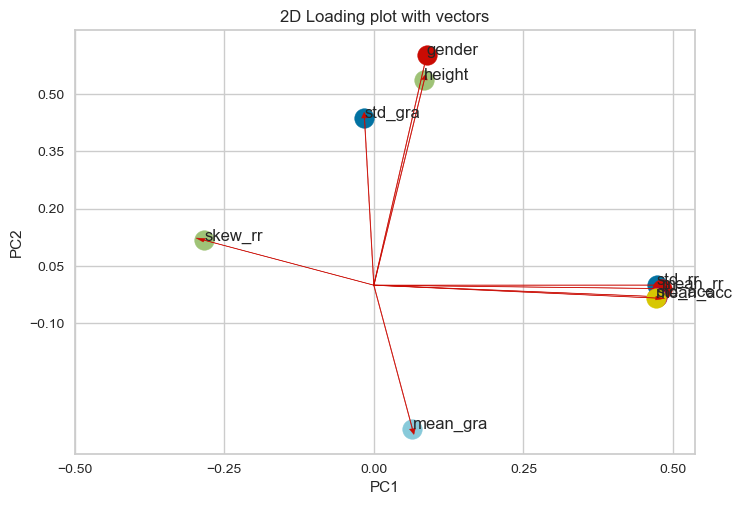

In [251]:
# Ref 3 : continued 

import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
 # Define the axes
xticks = np.linspace(-0.5, 0.5, num=5)
yticks = np.linspace(-0.1, 0.5, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()
    

In [252]:
#total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pca_score, x=0, y=1, z=2, color=df_model.task_info,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


# Modeling with K_Means 

In [253]:
# Data is in : pca_score 

In [254]:
# https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(pca_score)


print(len(pca_score))

print(kmeans.labels_)
print(len(kmeans.labels_))

kmeans.labels_

 
unique_kmeansLabel= list(set(kmeans.labels_))
print(unique_kmeansLabel)

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1326
[0 0 0 ... 0 0 0]
1326
[0, 1]


[0 0 0 ... 0 0 0]


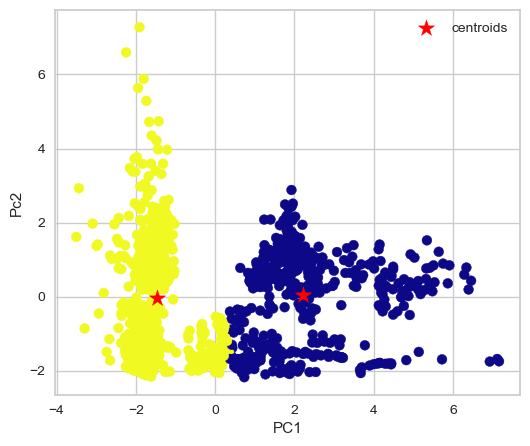

In [255]:

plt.figure(figsize=(6,5))
plt.scatter(pca_score[:,0], pca_score[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.plasma) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'red', 
            label = 'centroids')
plt.legend(loc = 'best')
plt.xlabel('PC1')
plt.ylabel('Pc2')

# 
y_validatation=kmeans.labels_

print(y_validatation)

# (referance Notes from class):k means-  02_Clustering_Kmeans

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

Sum of squared error(SSE) [11933.999999999993, 7599.851262552156, 5963.754051704788, 4818.656124580985, 4062.1362695878015, 3335.1285172828393, 2996.73667819618, 2689.991260958817, 2502.8443491801963]


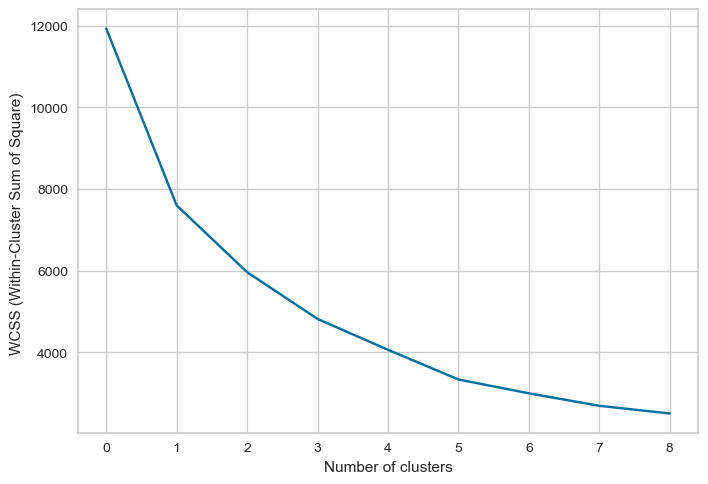

In [256]:
sse = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_score)
    sse.append(kmeans.inertia_)
    
print("Sum of squared error(SSE)", sse)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square) ')
plt.plot(sse)
plt.grid(True)
plt.show()


C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\annab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

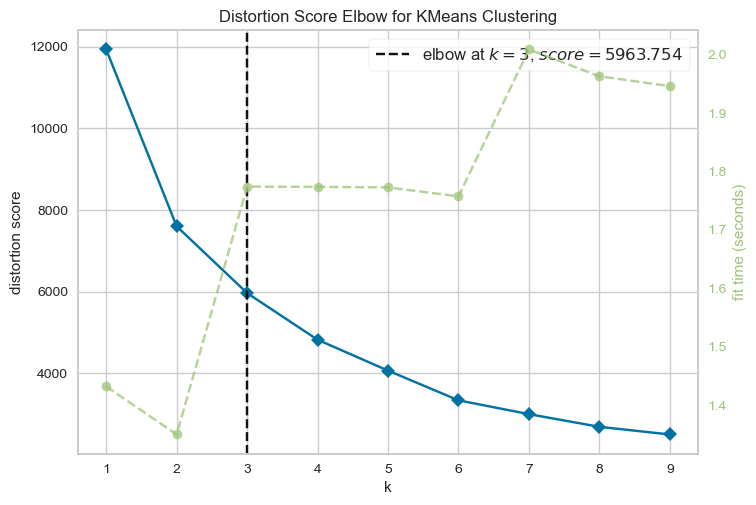

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [257]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(pca_score)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3456, 12]


Text(0.5, 1.0, 'Group(Pink:sit & stand),(Cyan: go upstais, go downstair, jogg & walk)')

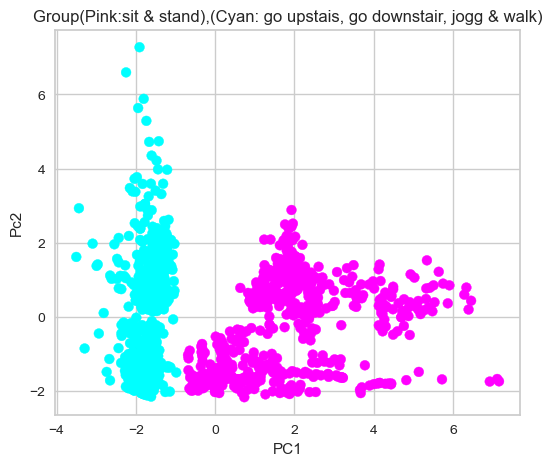

In [258]:
# Expected results 
unique_stationay_yes_no= list(set(df_model.stationay_yes_no))
print(unique_stationay_yes_no)

plt.figure(figsize=(6,5))
plt.scatter(pca_score[:,0], pca_score[:,1], s = 50,c = df_model.stationay_yes_no, cmap = plt.cm.cool) 

plt.legend(loc = 'best')
plt.xlabel('PC1')
plt.ylabel('Pc2')
plt.title('Group(Pink:sit & stand),(Cyan: go upstais, go downstair, jogg & walk)')

# (referance Notes from class):k means-  02_Clustering_Kmeans

In [259]:
# referance : https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

ynew_actual= df_model.stationay_yes_no


print(y_validatation)
print(len(y_validatation))
print(list(set(y_validatation)))

ynew_actual= df_model.stationay_yes_no
y_validatation=kmeans.labels_

df_results = pd.DataFrame()
df_results["actual_activity"] = ynew_actual
df_results["validate_activity"] = y_validatation

df_results

[0 0 0 ... 0 0 0]
1326
[0, 1]


,actual_activity,validate_activity
0,3456,3
1,3456,3
2,3456,3
3,3456,3
4,3456,3
...,...,...
1321,3456,5
1322,3456,2
1323,3456,2
1324,3456,2


# Comparison of expected clustering and kmeans clustering 

In [260]:
# Total =1326
# tot correct = 557+692 =1249
# accuracy =0.9419


ValueError: Unknown format code 'h' for object of type 'int'

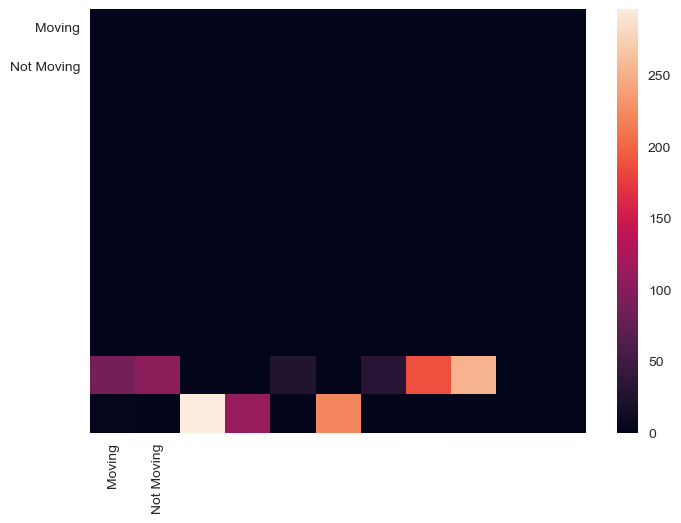

In [261]:

from sklearn.metrics import confusion_matrix

#compute the confusion matrix.
cm = confusion_matrix(ynew_actual,y_validatation)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='h', 
            xticklabels=['Moving','Not Moving'],
            yticklabels=['Moving','Not Moving'])

plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



# hierarchy (referance Notes from class)

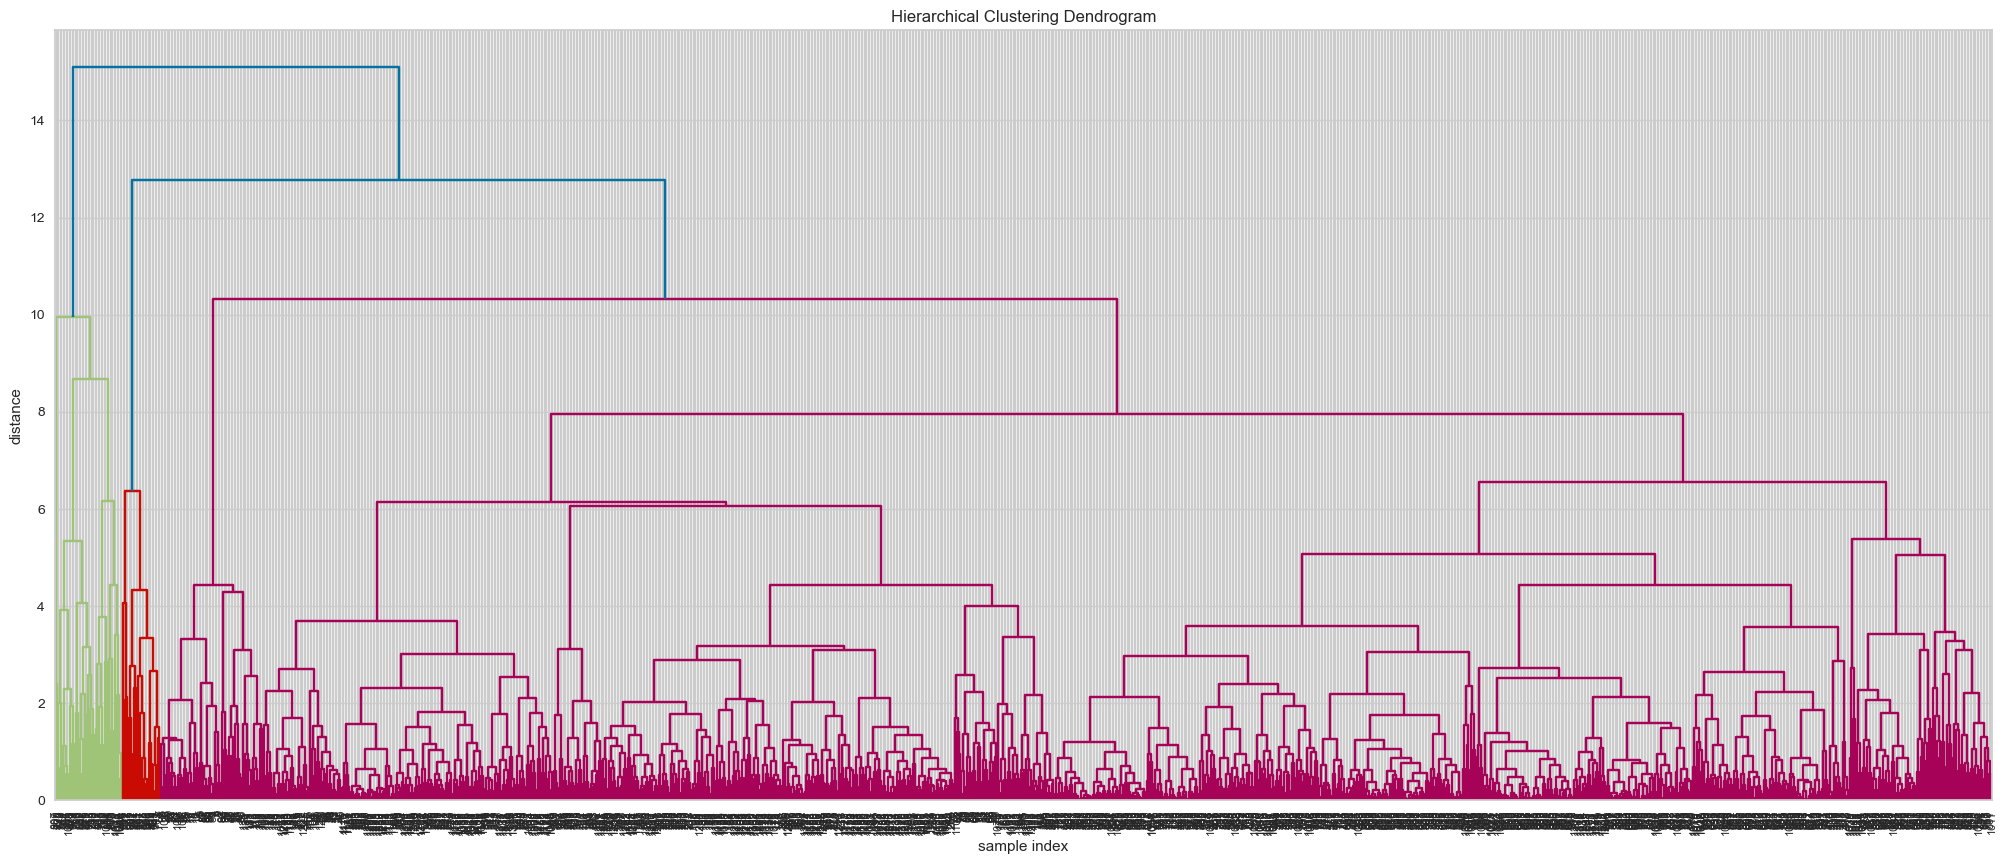

In [266]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(pca_score, "complete")
hc_average = linkage(pca_score, "average")
hc_single = linkage(pca_score, "single")

from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [268]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 3).T) # Printing transpose just for space
y_hirar = cut_tree(hc_complete, n_clusters = 3)


len(y_hirar)
df_results["validate_hirar"] = y_hirar
df_results

[[0 0 0 ... 0 0 0]]


,actual_activity,validate_activity,validate_hirar
0,3456,3,0
1,3456,3,0
2,3456,3,0
3,3456,3,0
4,3456,3,0
...,...,...,...
1321,3456,5,0
1322,3456,2,0
1323,3456,2,0
1324,3456,2,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 1, 2]


Text(0.5, 1.0, 'hierarchy cluster')

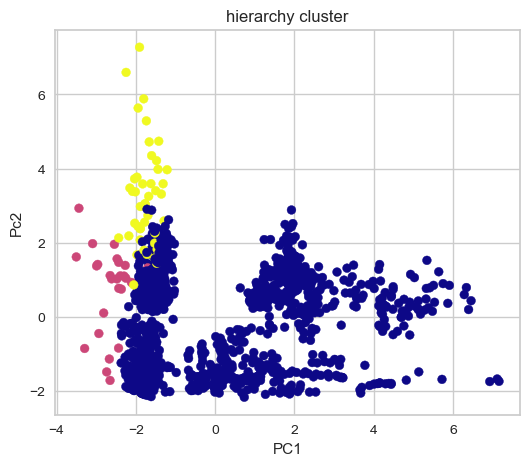

In [269]:

unique_validate_hirar= list(set(df_results.validate_hirar))
print(unique_validate_hirar)

plt.figure(figsize=(6,5))
plt.scatter(pca_score[:,0], pca_score[:,1], s = 40,c = df_results.validate_hirar,cmap = plt.cm.plasma) 

plt.legend(loc = 'best')
plt.xlabel('PC1')
plt.ylabel('Pc2')
plt.title('hierarchy cluster')

# (referance Notes from class):k means-  02_Clustering_Kmeans